In [1]:
from spline_learner_poe import *
from spline_learner_poe_old import *
import matplotlib.pyplot as plt

In [2]:
ta = -100
tb = 0.1
meas_var = 10
proc_var = 10
theta_var = 100
a_var = 100
b_var = 100
poe_var = 10
nsamps = 3
nptspersamp = 20
dt = .1
np.random.seed(4)
spl = SplineLearnerPOE(ta,tb,meas_var,proc_var,theta_var,a_var,b_var,
                       poe_var,nsamps,nptspersamp,dt)

np.random.seed(4)
spl2 = SplineLearnerPOE_old(ta,tb,meas_var,proc_var,theta_var,a_var,b_var,
                       poe_var,nsamps,nptspersamp,dt)

spl.plot_iter = 109
spl2.plot_iter = 109

/Users/jendawk/Documents/GeorgTravisRot/POE_learner/spline_learner_poe.py:52: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.true_betas = [np.linalg.lstsq(self.true_bmat1[i],self.ys[i])[0] for i in range(len(self.true_bmat1))]
/Users/jendawk/Documents/GeorgTravisRot/POE_learner/spline_learner_poe_old.py:47: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.true_betas = [np.linalg.lstsq(self.true_bmat1[i],self.ys[i])[0] for i in range(len(self.true_bmat1))]


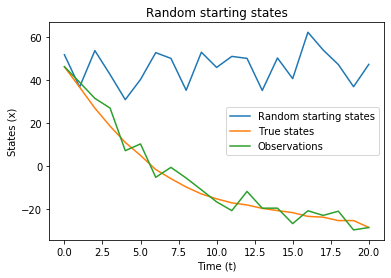

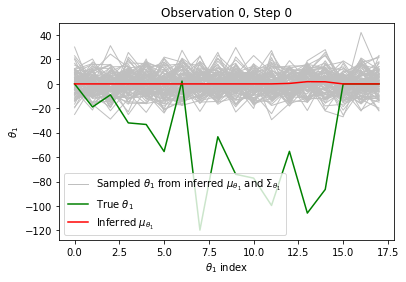

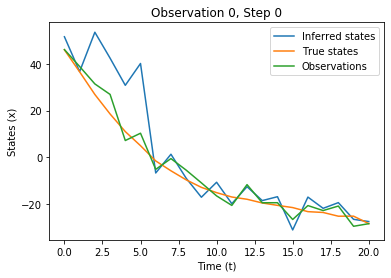

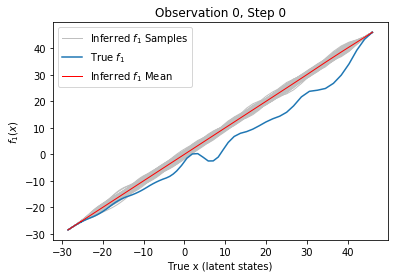

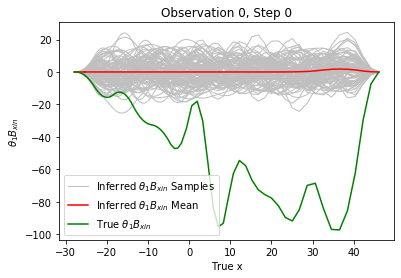

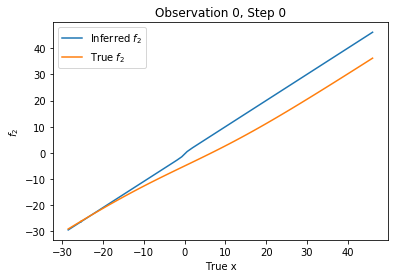

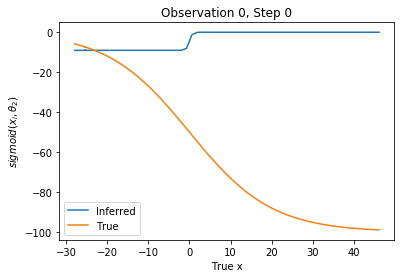

[-9.057392814294866, -2.955747462347161]
Step 0
Meas Var:10
Proc Var:21954.66719295461
POE Var:1489.623880109861


/Users/jendawk/Documents/GeorgTravisRot/POE_learner/helper.py:3: RuntimeWarning: overflow encountered in exp
  y = yscale/(1+np.exp(-xscale*(t)))


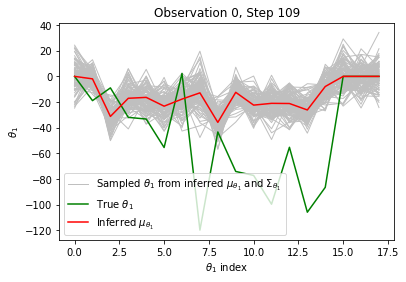

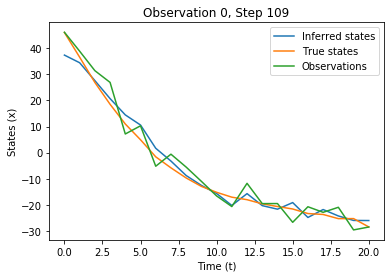

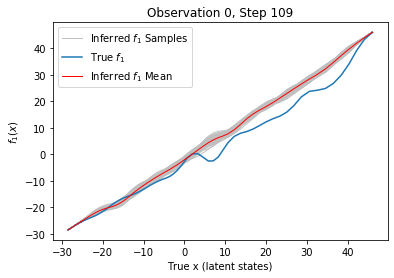

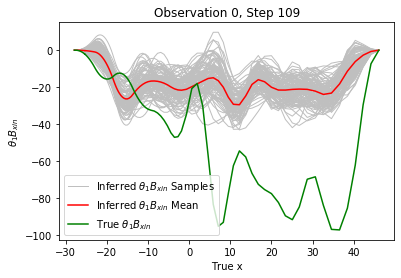

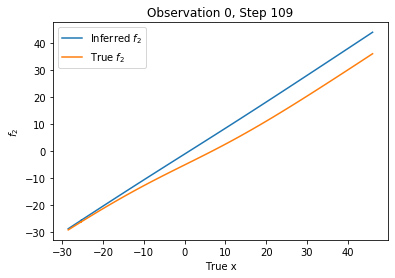

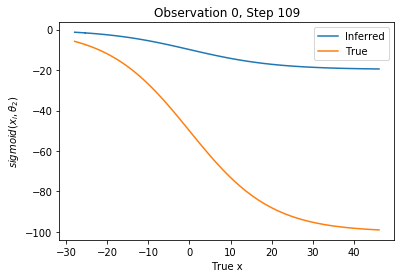

[-19.677940569478324, 0.09554154420632122]
Step 109
Meas Var:10
Proc Var:123.64058097392267
POE Var:10.83151641091162
Observation 0 Complete at 109steps


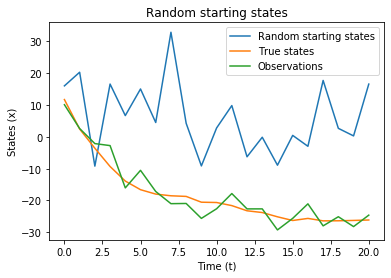

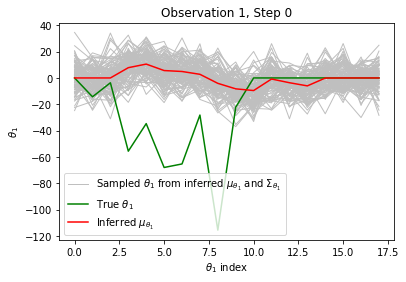

/Users/jendawk/Documents/GeorgTravisRot/POE_learner/spline_learner_poe.py:128: RuntimeWarning: overflow encountered in exp
  prob_keep = np.exp(num - dem)


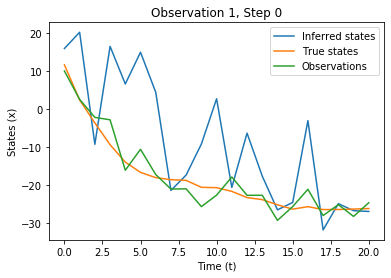

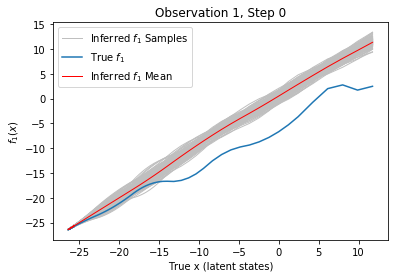

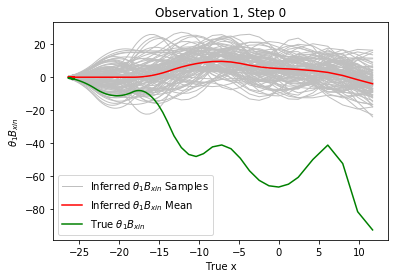

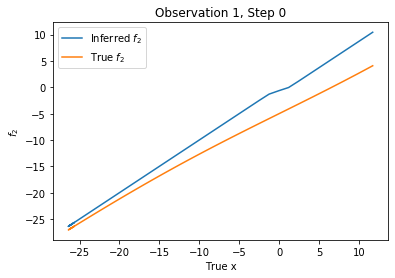

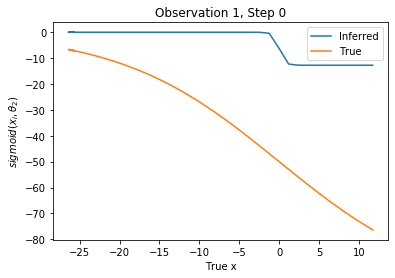

[-12.752621841941252, 2.7448493540963517]
Step 0
Meas Var:10
Proc Var:2890.3115226276873
POE Var:1701.640216727337


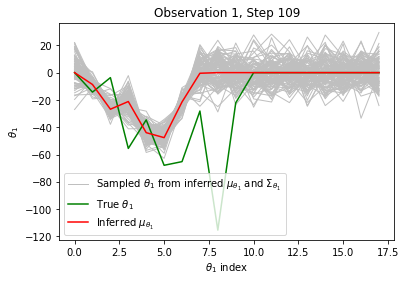

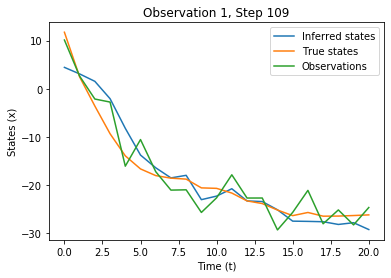

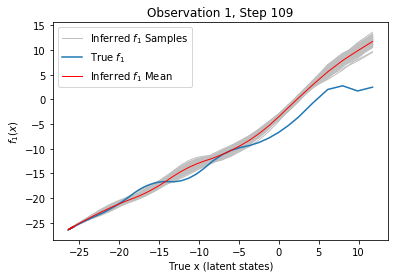

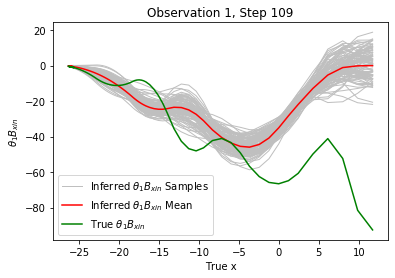

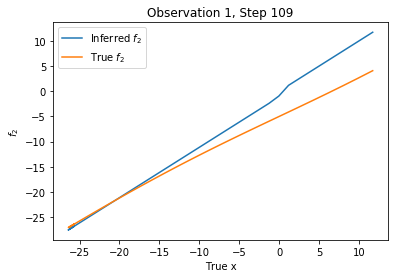

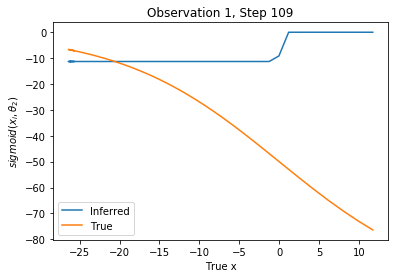

[-11.301636239597903, -49.59675971380943]
Step 109
Meas Var:10
Proc Var:30.95095223901227
POE Var:10.277234228232821
Observation 1 Complete at 109steps


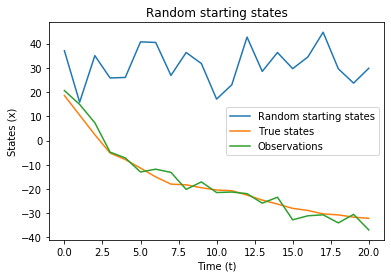

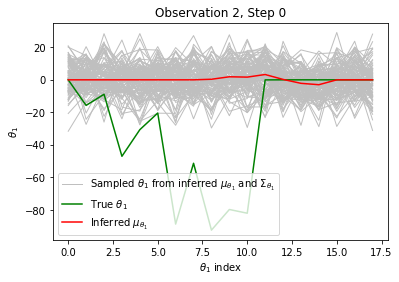

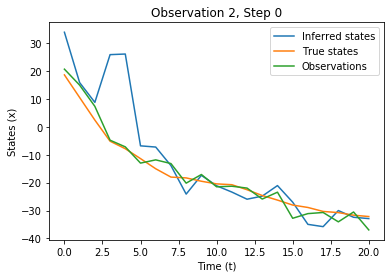

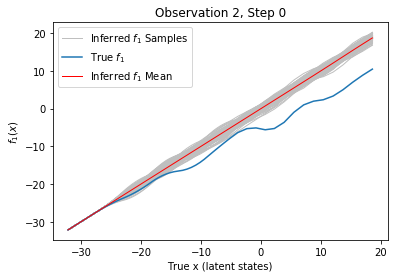

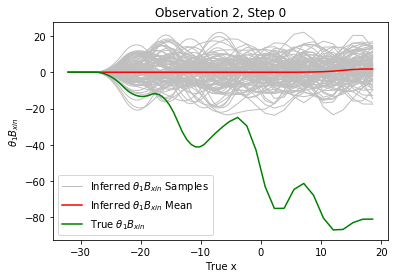

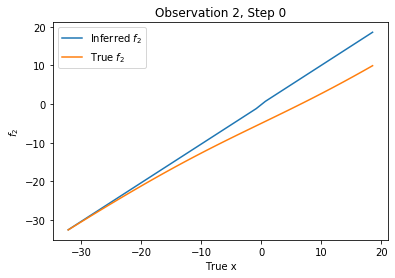

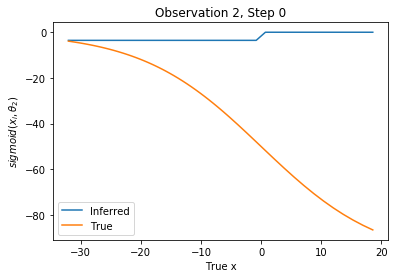

[-3.5475277916671644, -17.040490128649004]
Step 0
Meas Var:10
Proc Var:9744.679231225426
POE Var:2751.57380384641


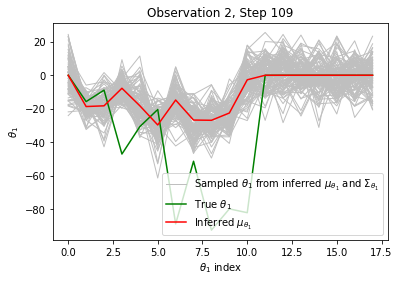

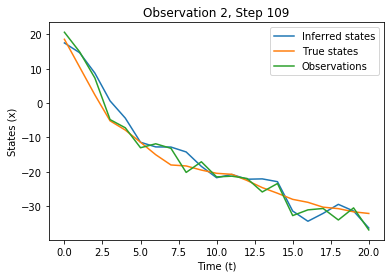

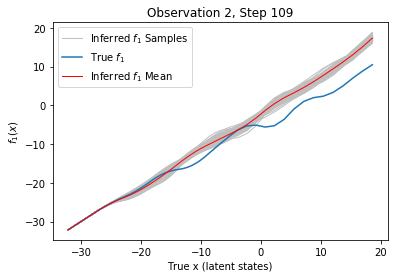

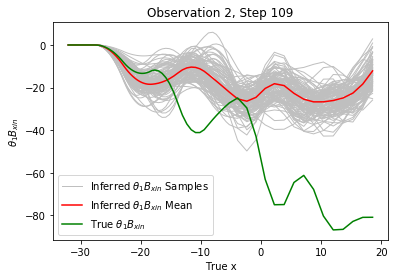

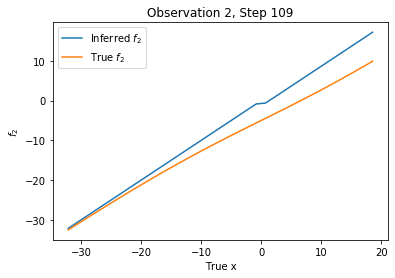

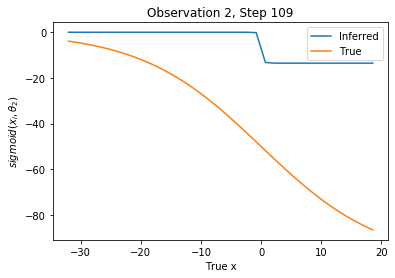

[-13.529249681080836, 5.242426920794423]
Step 109
Meas Var:10
Proc Var:114.18419928371539
POE Var:10.354712866361853
Observation 2 Complete at 109steps


In [3]:
np.random.seed(4)
spl.run(gibbs_steps = 110)

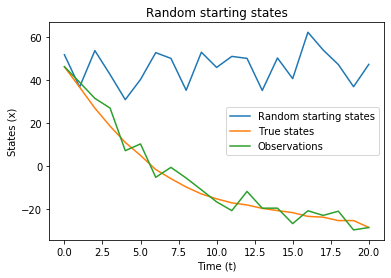

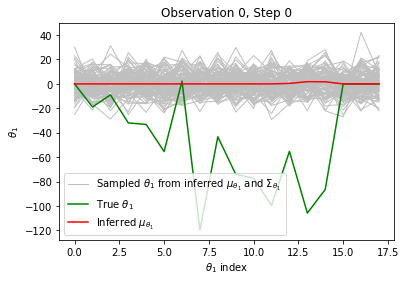

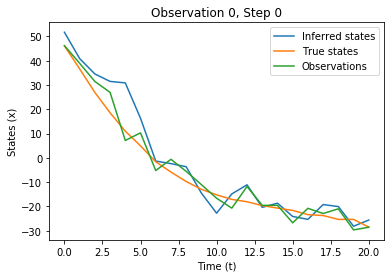

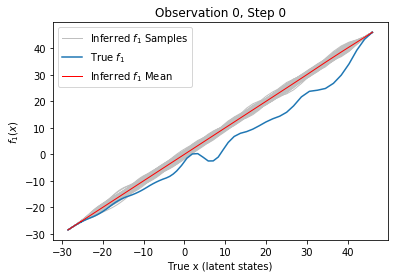

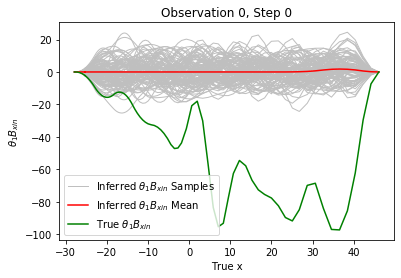

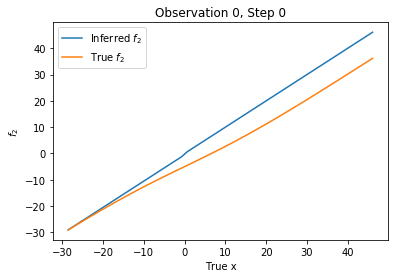

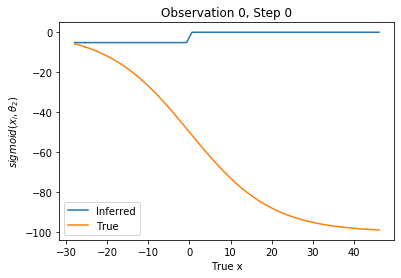

[-5.181836348085943, -8.800700418707137]
Step 0
Meas Var:10
Proc Var:21954.66719295461
POE Var:1489.623880109861


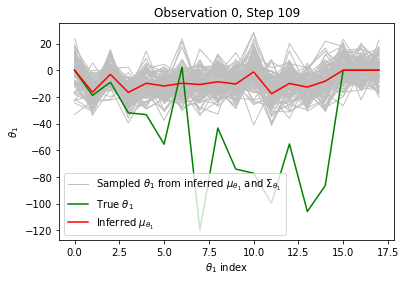

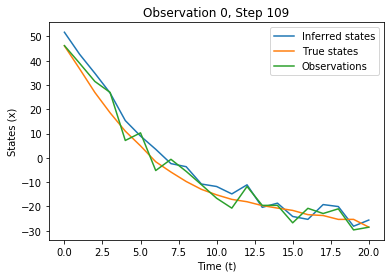

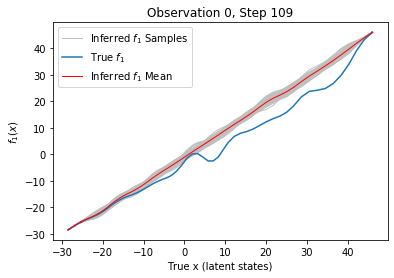

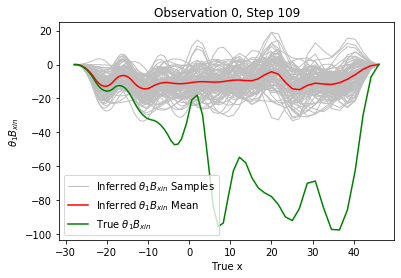

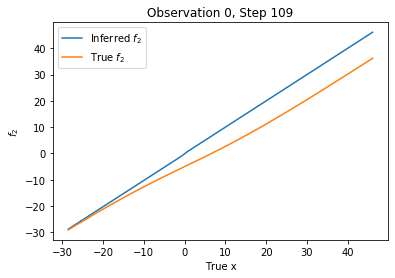

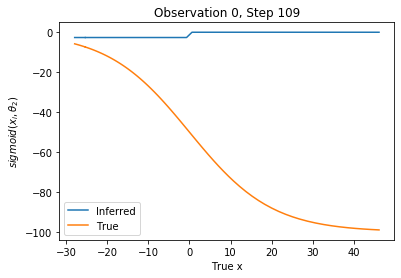

[-2.639921361062574, -28.575094022110164]
Step 109
Meas Var:10
Proc Var:324.02549786721585
POE Var:10.53674632906646
Observation 0 Complete at 109steps


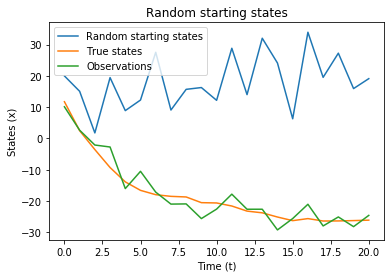

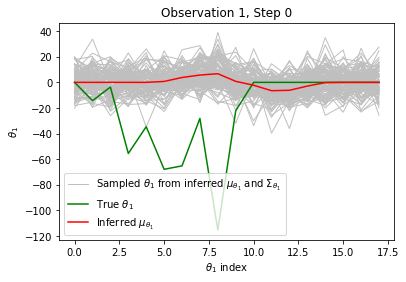

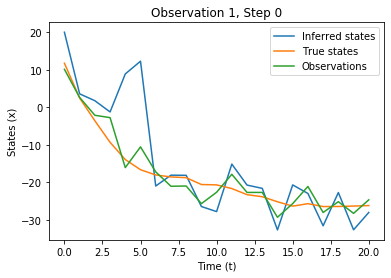

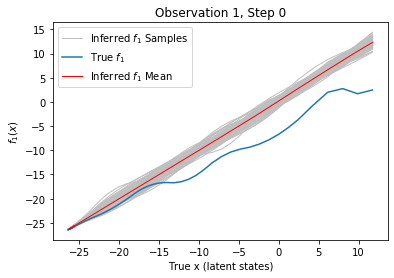

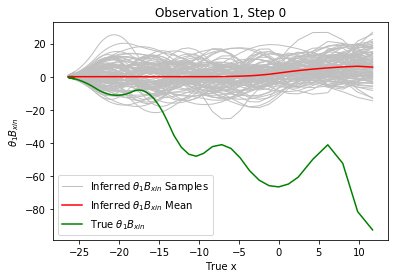

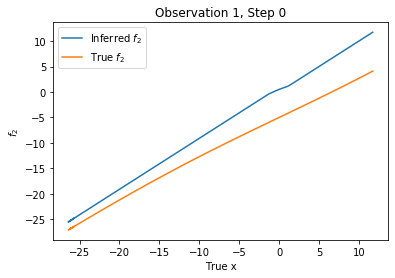

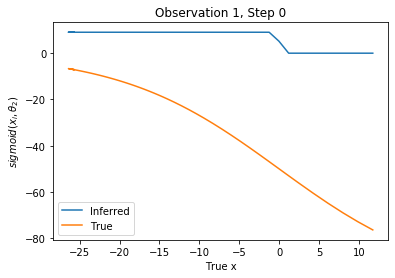

[9.053097721855423, -10.211084631339247]
Step 0
Meas Var:10
Proc Var:4841.3531828755295
POE Var:1223.669873181326


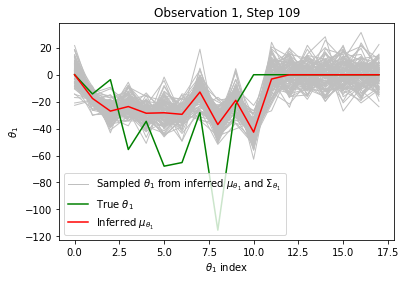

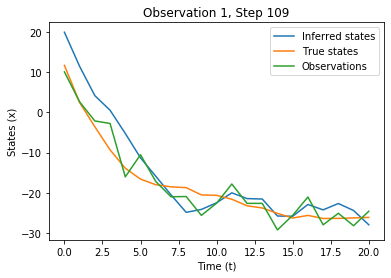

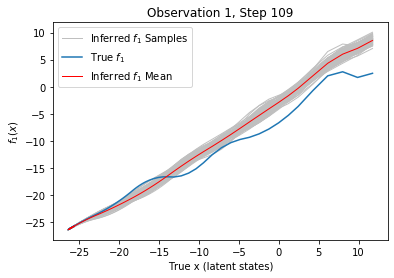

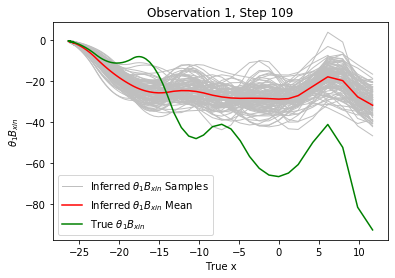

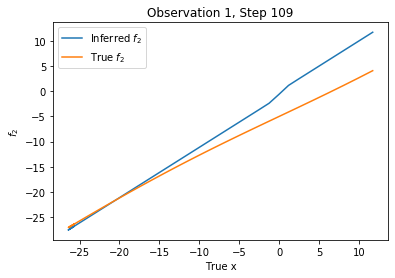

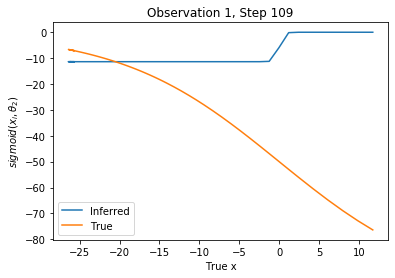

[-11.377862062106411, -3.563443983707069]
Step 109
Meas Var:10
Proc Var:77.44030931557388
POE Var:10.422266271172726
Observation 1 Complete at 109steps


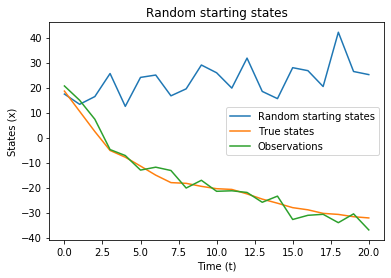

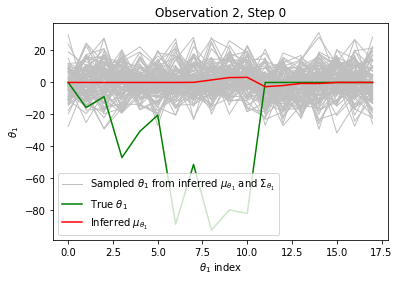

/Users/jendawk/Documents/GeorgTravisRot/POE_learner/spline_learner_poe_old.py:106: RuntimeWarning: overflow encountered in exp
  prob_keep = np.exp(num - dem)


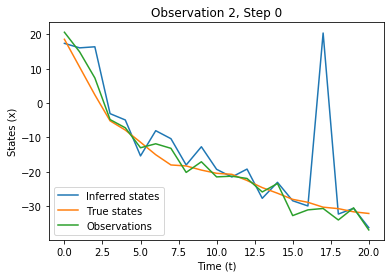

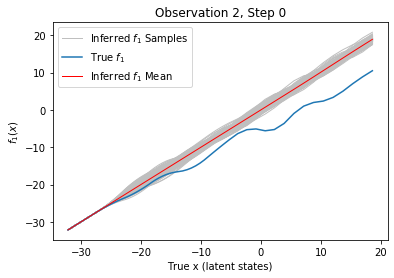

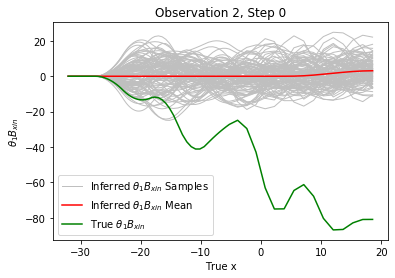

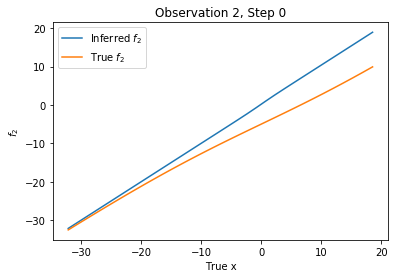

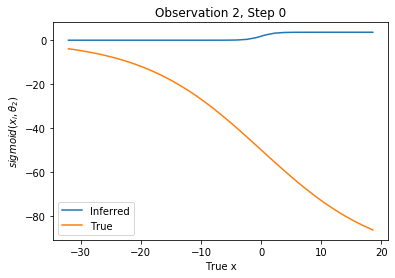

[3.626930958340269, 0.9084157198472198]
Step 0
Meas Var:10
Proc Var:8551.5448570971
POE Var:2799.5033642654566


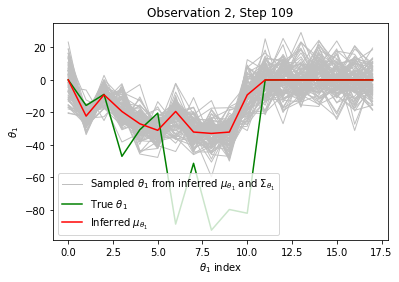

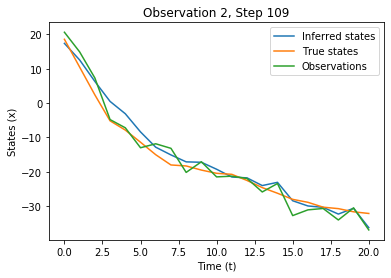

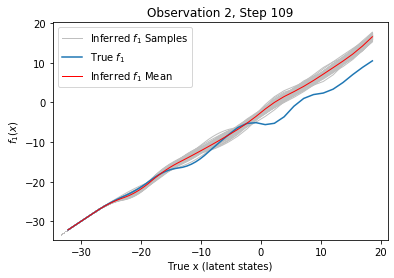

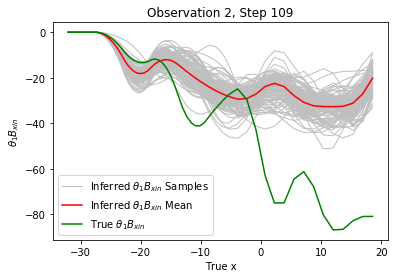

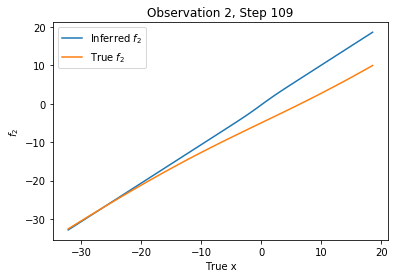

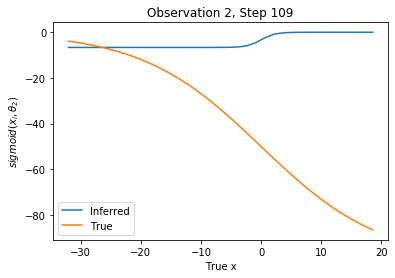

[-6.644004648810137, -0.898187254611984]
Step 109
Meas Var:10
Proc Var:64.72507620255284
POE Var:11.377334104498507
Observation 2 Complete at 109steps


In [4]:
np.random.seed(4)
spl2.run(gibbs_steps = 110)

In [5]:
a = spl.trace_a
b = spl.trace_b

f1 = [f[-10:] for f in spl.trace_f1]
f2 = [f[-10:] for f in spl.trace_f2]

a2 = spl2.trace_a
b2 = spl2.trace_b

f12 = [f[-10:] for f in spl2.trace_f1]
f22 = [f[-10:] for f in spl2.trace_f2]

diff = np.array([[np.mean(np.abs(f1[i][j]-f2[i][j])) for i in range(len(f1))] for j in range(len(f1[0]))])
diff2 = np.array([[np.mean(np.abs(f12[i][j]-f22[i][j])) for i in range(len(f12))] for j in range(len(f12[0]))])

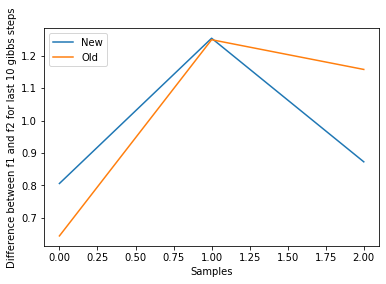

In [6]:
plt.plot(np.mean(diff,0), label = 'New')
plt.plot(np.mean(diff2,0), label = 'Old')
plt.xlabel('Samples')
plt.ylabel('Difference between f1 and f2 for last 10 gibbs steps')
plt.legend()

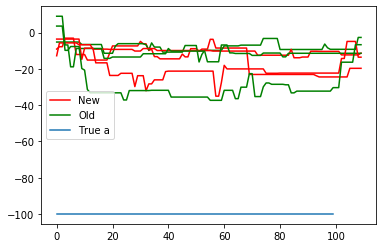

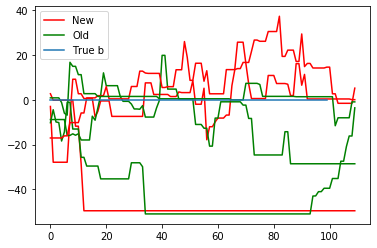

In [8]:
plt.plot(a[0], c = 'r',label = 'New')
plt.plot(a2[0], c = 'g',label = 'Old')
for i in range(1,len(a)):
    plt.plot(a[i], c = 'r')
    plt.plot(a2[i], c = 'g')
plt.plot(spl.true_a*np.ones(100),label = 'True a')
plt.legend()
plt.show()

plt.plot(b[0], c = 'r',label = 'New')
plt.plot(b2[0], c = 'g', label = 'Old')
for i in range(1,len(b)):
    plt.plot(b[i], c = 'r')
    plt.plot(b2[i], c = 'g')
plt.plot(spl.true_b*np.ones(100),label = 'True b')
plt.legend()
plt.show()

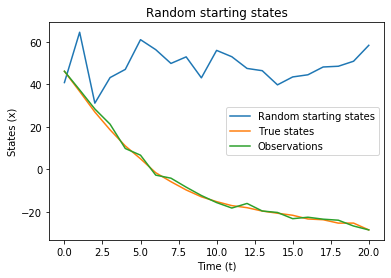

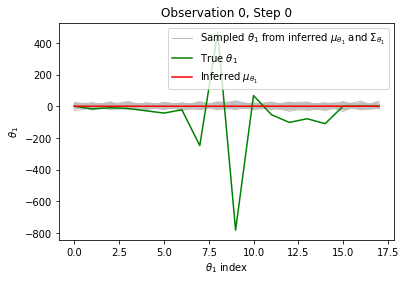

/Users/jendawk/Documents/GeorgTravisRot/POE_learner/spline_learner_poe.py:128: RuntimeWarning: overflow encountered in exp
  prob_keep = np.exp(num - dem)


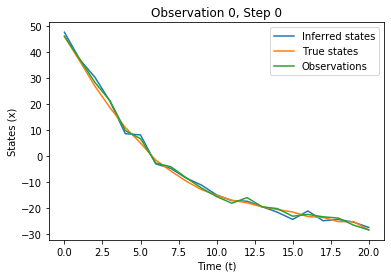

KeyboardInterrupt: 

In [21]:
mnoise = [1,10,100]
di = []
avec=[]
bvec = []
nsamps = 3

for k in range(3):
    meas_var = mnoise[k]
    np.random.seed(4)
    spl = SplineLearnerPOE(ta,tb,meas_var,proc_var,theta_var,a_var,b_var,
                       poe_var,nsamps,nptspersamp,dt)
    spl.plot_iter = 109
    spl.run(gibbs_steps=110, plot = True) 
    
    a = [f[-10:] for f in spl.trace_a]
    b = [f[-10:] for f in spl.trace_b]
    
    avec.append(spl.trace_a)
    bvec.append(spl.trace_b)
    
    f1 = [f[-10:] for f in spl.trace_f1]
    f2 = [f[-10:] for f in spl.trace_f2]

    diff = np.array([[np.mean(np.abs(f1[i][j]-f2[i][j])) for i in range(len(f1))] for j in range(len(f1[0]))])
    di.append(np.mean(diff,0))




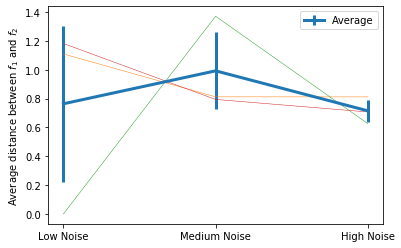

In [6]:
dat = np.array(di)
means = np.mean(dat,1)
stds = np.std(dat,1)
plt.errorbar([0,1,2],means,yerr = stds,label = 'Average',linewidth = 3)
for i in range(dat.shape[1]):
    plt.plot(dat[:,i],linewidth = .5)
    plt.xticks([0,1,2],['Low Noise','Medium Noise','High Noise'])
    plt.ylabel(r'Average distance between $f_{1}$ and $f_{2}$')
plt.legend()
plt.savefig('imfolder/comp_noise_f1f2.png')
plt.show()

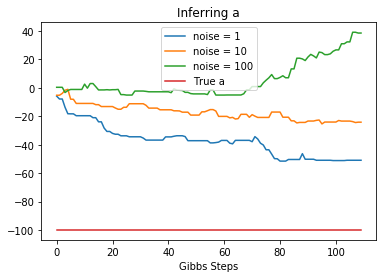

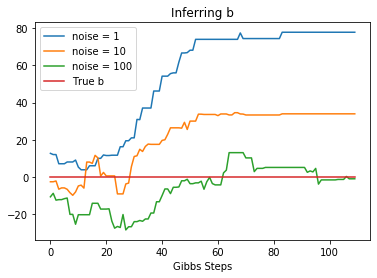

In [7]:
plt.title('Inferring a')
for i in range(len(mnoise)):
    plt.plot(np.mean(np.array(avec[i]),0),label = 'noise = ' + str(mnoise[i]))
    plt.xlabel('Gibbs Steps')
plt.plot(spl.true_a*np.ones(110),label = 'True a')
plt.legend()
plt.savefig('imfolder/comp_noise_a.png')
plt.show()
   
plt.title('Inferring b')
for i in range(len(mnoise)):
    plt.plot(np.mean(np.array(bvec[i]),0),label = 'noise = ' + str(mnoise[i]))
    plt.xlabel('Gibbs Steps')
plt.plot(spl.true_b*np.ones(110),label = 'True b')
plt.legend()
plt.savefig('imfolder/comp_noise_b.png')
plt.show()